## **New York City Taxi Fare Prediction**

*TP #1: Create an outline for your notebook & for each section before you start coding*
Here's is an outline of the project:
1. Download the dataset
2. Explore and analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded and baseline models.
5. Make predictions andd submit to Kaggle
6. Perform feature engineering
7. Train & evaluate different models
8. Tune hyperparamaters for the best models
9. Train on a GPU with the entire dataset
10. Document and publish the project online.bold text



### **1. Download the Dataset**

In [1]:
##--quiet is used to avoid output from installation
!pip install opendatasets pandas numpy scikit-learn xgboost --quiet

Download Data from Kaggle
We'll use the opendatasets library to dowload the dataset. You will need to upload your kaggle API key (a file called `kaggle.json`) to Colab.

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data'

In [4]:
 od .download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rumerodgers
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:14<00:00, 117MB/s] 



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [5]:
data_dir = 'new-york-city-taxi-fare-prediction'

####**View Dataset Files**
Let's look at the size no. of lines and first few lines of each file.

In [6]:
#Shell command that is passed directly to the system terminal i.e the exclamation mark
#When we put anything inside the curly bracket Jupiter replaces the expression with the value of the variable
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Sep  9 06:39 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Sep  9 06:39 sample_submission.csv
-rw-r--r-- 1 root root 960K Sep  9 06:39 test.csv
-rw-r--r-- 1 root root 5.4G Sep  9 06:40 train.csv


In [7]:
#Number of rows
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [8]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [9]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [10]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

The dataset has 55 million rows of data.

In [11]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [12]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


**ID**

**Key** - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field.
* Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.

**Features**
1.  **pickup_datetime** - timestamp value indicating when the taxi ride started.
2. **pickup_longitude** - float for longitude coordinate of where the taxi ride started.
3. **pickup_latitude** - float for latitude coordinate of where the taxi ride started.
4. **dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.
5. **dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.
6. **passenger_count** - integer indicating the number of passengers in the taxi ride.

**Target**

**fare_amount** - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.


**Observations**
* This is a supervised learning regression problem. (We are predicting 'fare_amount' which is a continuous number)
* Training data is 5.5 GB
* Training data has 5.5 million rows
* Test set is much smaller(< 10,0000 rows)
* The training set has 8 columns:
  * `key`(a unique identifier)
  * `fare_amount` (target_column)
  * `pickup_datetime`
  * `pickup_longitude`
  * `pick_up latitude`
  * `passenger_count`
* The test set has all columns except the target column `fare_amount`.
* The submission file should contain `key` and `fare_amount` for each test sample.


####**Loading Training Set**
>**TIP #2**: When working with large datasets, always start with a sample to experiment and iterate faster.

Loading the entire dataset in to Pandas is going to be slow, so we can use the possible optimizations:
* Ignore the `key` column, (We really don't need to use the unique identifier present in the dataset and just loading it can slow things down).
* Parse pickup datetime while loading the data.(This makes things faster)
* Specify data types for other columns (so that Pandas doesn't try and specify after looking at all the rows)
  * `float32` for geo coordinates
  *  `float32` for fare amounts
  * `uint8` for passenger count
* Work with a 1% sample of the data(~500k rows), then come back and work with the entire dataset.

We can apply these optimizatins while using pd.read_csv.


In [13]:
import pandas as pd

In [14]:
sample_fraction = 0.01

In [15]:
selected_cols  = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [16]:
import random
random.random()# Generate random numbers between 0 to 1

0.6135700290256624

In [17]:
dtypes = {
 'fare_amount': 'float32',
 'pickup_longitude': 'float32',
 'pickup_latitude': 'float32',
 'dropoff_longitude': 'float32',
 'dropoff_latitude': 'float32',
 'passenger_count': 'uint8'
    }
##The function skip_row get the row number
def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_fraction

random.seed(42)
df = pd.read_csv(data_dir+'/train.csv',
                 usecols = selected_cols,
                 parse_dates = ['pickup_datetime'],
                 dtype = dtypes,
                 skiprows = skip_row )

In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


We use shell command because the notebooks are so large, otherwise use OS modules.

>**TIP #3**: *Fix the seeds for random number generators so that you get the same results every time you run your notebook.*

>**EXERCISE**: Try loading 3%, 10%, 30% and 100% of the data.

####**Load the Test Data**
For the test set, we'll simply provide the datatypes

In [19]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype =dtypes, parse_dates = ['pickup_datetime'])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


### **2. Explore the Dataset**
* Basic info about the training set
* Basic info about test set
* Exploratory data analysis and visualization
* Ask & answer questions

#### **Training Set**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [21]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [22]:
df['pickup_datetime'].min(),df['pickup_datetime'].max(),

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about the data:
* 550k+ rows as expected
* No missing data(in the sample)
* `fare_amount` ranges from `$52.0` to `$499.0`
* `passenger_count` ranges from 0 to 208
* There seem to be some errors in the latitude and longitude values
* Dates range from 1st Jan 2009 to 30th June 2015
* The dataset takes up ~19mb of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.



#### **Test Set**

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [25]:
test_df['pickup_datetime'].min(),test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

*   9914 rows of data
*   No missing values
*   No obvious data entry errors
*   1 to 6 passengers(we can limit training data to this range)
*   Latitudes lie between 40 and 42
*   Longitudes lie between -75 and -72
*   Pickup dates from Jan 1st 2009 to Jun 30th 2015(same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.



### **3. Exploratory Data Analysis and Visualization**

>**EXERCISE:** Create graphs (histograms, line charts, bar charts, scatter plots) to study the distribution of values in each column, and the relationship of each input column to the target.

####**Ask & Answer Questions**

**Exercise:** Ask & answer questions about the dataset:
1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance
7.???

Performing EDA on your dataset and asking questions will help you develop a deeper understanding of the data and ive you ideas for feature engineering.

>**TIP #4:** Take an iterative approah to building ML models: do some EDA, do some feature engineering, train a model, then repeat to improve your model.


#### **Split Training & Validation Set**
We'll set aside 20% of the training data as the validations set, to evaluate the models we train on previously unseen data. SInce the test set and training set have the same data renges, we can pick a random 20% fraction.

> **TIP #5**: Your validation set should be as similar to the test set or real-world datas as possible i.e. the evaluation metric score of a model on validation & test sets should be very close. The way you know that is when you find the RMSE on the validation set and the RMSE on the Validation set is closer to one on the test test. The valiadtion score must be similar/close to the one on the test set.

Because the test set and the training set have the same date ranges, the test set lies between Jan 2009 to June 2015 and the training set also lies between Jan 2009 to June 2015. We can take a random 20 % fraction of the training set as the validation set.

*Suppose the test set was in the future, i.e. the training set lies between 2009 to 2014 and the test set was data from 2015. Then to make the validation set similar to the test set, we should have picked the data for 2014 as the validation set and the data for 2014 and before as training set.*

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_df, val_df  = train_test_split(df, test_size = 0.2, random_state = 42)

In [28]:
len(train_df), len(val_df)

(441960, 110490)

#### **Fill/Remove Missing Values**
There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have alot of training data)  

In [29]:
train_df = train_df.dropna()##Drops all the rows where any of the column has has empty/missing value.
val_df = val_df.dropna()

#### **Extract Inputs and Outputs**

In [30]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [31]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

We can't pass a `datetime` column by itself because it is a time stamp and not a number. we split the `datetime` column in to multiple columns.

In [32]:
target_col = 'fare_amount'

####**Training**

In [33]:
train_inputs = train_df[input_cols]

In [34]:
train_targets = train_df[target_col]

In [35]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [36]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


####**Validation**

In [37]:
val_inputs = val_df[input_cols]

In [38]:
val_targets = val_df[target_col]

In [39]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [40]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


####**Test**

In [41]:
test_inputs =test_df[input_cols]

In [42]:
test_inputs# There are no targets

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


###**4. Train & Evaluate Hardcoded Model**
>**TIP #6**: Always create a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat.
*   Hardcoded model: always predict average fare.
*   Baseline model: Linear regression.

For evaluation of the dataset use `RMSE` error.



#### **Train & Evaluate Hardcoded Model**
Let's create a simple model that always predicts the average.

In [43]:
import numpy as np

In [44]:
class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()

  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [45]:
mean_model = MeanRegressor()

In [46]:
mean_model.fit(train_inputs, train_targets)

In [47]:
mean_model.mean

11.354714

In [48]:
train_preds = mean_model.predict(train_inputs)

In [49]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [50]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [51]:
val_preds = mean_model.predict(val_inputs)

In [52]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [53]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
def rmse(targets, preds):
  return mean_squared_error(targets, preds, squared = False)

In [56]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

9.789782

In [57]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

9.899954

On average the predictions of our model whih is always USD. 35  are different from the actual value by 9 which is very bad because the values we are predicting, the 75th percentile is about 12.

If you are trying to predict values in the range of 10-20 and you are off by 9, that is a bad model which is expected.

Our dumb hard-coded model is off by USD. 9.899 on average, which is pretty bad considering the average fare is USD. 11.35.

Any model we train should have a lower rmse.

#### **Train & Evaluate Baseline Model**

We'll train a linear regression model as our `baseline`, which tries to express the target as a weighted sum of the inputs.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model = LinearRegression()

In [60]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [61]:
train_preds  =linear_model.predict(train_inputs)
train_preds

array([11.546237, 11.28461 , 11.28414 , ..., 11.458918, 11.284281,
       11.284448], dtype=float32)

In [62]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [63]:
rmse(train_targets, train_preds)

9.788632

In [64]:
val_preds = linear_model.predict(val_inputs)

In [65]:
rmse(val_targets, val_preds)

9.898088

The model predicts are still close to 11 by different from the previous but still way off.

The rmse is 1% better than our average model.

The linear regression model is off by USD 9.898, which isn't much better than simply predicting the average.

This is mainly because the training data(geocoordinates) is not in a format that's useful for the model, and we are not using one of the most important columns: pickup date & time

However, now we have a baseline that our other models should ideally beat.

The model cannot easily figure out how the latitudes and longitudes are connected, the distance between. Feature Engineering come in to play to create this complex relationships. This is why the baseline model is bad.

### **5.Make Predictions and Submit to Kaggle**

> **TIP #7:** When working on a Kaggle competition, submit early and submit often (ideally daily). The best way to improve your model is to try and beat your previous score.

* Make predictions for the test set.
* Generate submissions CSV
* Submit to Kaggle
* Record in experiment tracking sheet


In [66]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [67]:
test_preds = linear_model.predict(test_inputs)

In [68]:
test_preds

array([11.28428  , 11.284634 , 11.284384 , ..., 11.721249 , 11.7207985,
       11.720594 ], dtype=float32)

In [69]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [70]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


Replace the fare amount with the test preds because the rows in the submission file correspond to the rows in the test file.

In [71]:
sub_df['fare_amount'] = test_preds

In [72]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798


In [73]:
sub_df.to_csv('linear_model_submission.csv', index = None)

By submitting the file to Kaggle, we get a score of 9.4 implying that our test set metric is close to the validation metric.

>**TIP #8:** Create reusable functions for common tasks. They'll help you iterate faster and free up your mind to think about new ideas.

In [74]:
def predict_and_submit(model,test_inputs, fname):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname, index = None)
  return sub_df

In [75]:
predict_and_submit(linear_model, test_inputs, 'linear_sub2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798




**Common Questions?**
*Why do we train the model on 1% of the data?*
There are 55 million rows available for training, we have taken 1 % of the dataset for training the model so that we train the model first. Later, instead of using 1% of the data, use 10%, 20% or 100 % of the data at the very end and train a model on the entire 100% of the data. Then make predictions with that trained model on the test set and that should be better than training the model on 1% of the data.

*For regression problems, we created a model which gives the mean as the output and then try Linear Regression.*

*For classification problems, we predict the most common class or the random class.*

We use `Float32` because it supports 8 dp which is good enough to support Longitudes and Latitudes and utilizes less memory as compared to `Float64` - if you choose `Float` which has twice the memory, a challenge for large datasets.

Similarly if you pick `uint8`, the number of passengers being in the range of 1 to 200, we can remove an `eight` to reduce the size.


>**TIP #9:** Track your ideas & Experiments systematically to avoid being overwhelmed with dozens of models.

###**6. Feature Engineering**

> **TIP #10:** Take an iterative approach to feature engineering. Add some features, train a model, evaluate it, keep the features if they help, otherwise drop them then repeat. Don't spend weeks creating features, use the iterative approach.

This means taking the existing columns and performing operations on them to create new columns which might train better models. You apply human insights to provide inputs that suits the problem.

* Extract parts of the date
* Remove outliers and invalid data
* Add distance pick & drop to add linear relationship between the distance to be covered and the fare.
* Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observe the effect of adding each feature individually.



#### **Extract Parts of Date**

* Year
* Month
* Day
* Weekday
* Hour

In [76]:
def add_dateparts(df, col):
  df[col+'_year'] = df[col].dt.year
  df[col+'_month'] = df[col].dt.month
  df[col+'_day'] = df[col].dt.day
  df[col+'_weekday'] = df[col].dt.weekday
  df[col+'_hour'] = df[col].dt.hour

In [77]:
##col = 'pickup_datetime'
##train_df['pickup_datetime_year'] = train_df[col].dt.year
##train_df[col+'_year'] = train_df[col].dt.year

In [78]:
add_dateparts(train_df,'pickup_datetime')

In [79]:
add_dateparts(val_df,'pickup_datetime')

In [80]:
add_dateparts(test_df,'pickup_datetime')

In [81]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


*You can as well add more like start of Quarter, End of Year, Weekday, Weekend*

#### **Add Distance Between Pickup and Drop**

We can use the haversine distance.


In [82]:
 import numpy as np

 def haversine_np(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2  = map(np.radians,[lon1,lat1,lon2,lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = np.sin(dlat/2.0)**2+np.cos(lat2)*np.sin(dlon/2.0)**2

  c = 2*np.arcsin(np.sqrt(a))
  km = 6367 *c
  return km

In [83]:
def add_trip_distance(df):
  df['trip_distance'] = haversine_np(df['pickup_longitude'],
                                     df['pickup_latitude'],
                                     df['dropoff_longitude'],
                                     df['dropoff_latitude'])

In [84]:
add_trip_distance(train_df)

In [85]:
add_trip_distance(val_df)

In [86]:
add_trip_distance(test_df)

In [87]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.519546
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.373430
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.852706
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.410622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.597020
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.373800
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.253185
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.383194


In [88]:
##You can similarly try a for loop instead of the map function, they are similar in functionality
##lon_lat = [lon1, lat1, lon2, lat2]
##for i in range(len(lon_lat)):
##    lon_lat[i] = np.radians(lon_lat[i])

##lon1, lat1, lon2, lat2 = lon_lat

#### **Add Distance From Popular Landmarks**

> **TIP #11**: Creative feature engineering (**generally involving human insights or external data**) is a lot more effective than excessive hyperparameter tuning. Just one or two good features to improve the model's performance drastically:
* JFK Airport
* LGA Airport
* EWR Airport
* Times Square
* Met Museum
* World Trade Center

Do not add too many features, they might slow down your training, hence iterating is very important.

We'll add the distance from drop location

In [89]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [90]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name+'_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [91]:
def add_landmarks(a_df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat),  ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(a_df, name, lonlat)

In [92]:
add_landmarks(train_df)

In [93]:
add_landmarks(val_df)

In [94]:
add_landmarks(test_df)

In [95]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.519546,22.357670,10.764465,19.896507,4.357593,4.524443
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,22.827309,12.966133,17.910212,6.772912,2.048856
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.373430,22.779657,9.362413,21.403019,2.098433,6.690417
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.852706,24.269882,10.130967,21.071615,1.673512,7.320926
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.410622,23.905022,11.702779,18.985699,4.202836,4.577604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.597020,23.689043,10.275329,20.597256,2.368172,6.361401
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.373800,23.915705,15.498563,15.741378,9.306443,0.616495
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.253185,22.298054,12.838011,18.194120,7.029270,2.131721
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.383194,23.932608,11.649796,19.048845,4.106267,4.682941


#### **Remove Outliers and Invalid Data**

There seems to be some invalid data in each of the following columns:
* Fare amount
* Passenger count
* Pickup latitude and longitude
* Drop latitude and longitude

In [96]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [97]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.648236,22.931196,10.868707,20.868267,4.711630,6.327267
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,4.306024,3.509833,3.514937,4.409749,4.245221,4.574295
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401902,0.290512,0.324300,0.092185,0.041935
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.376966,22.536612,9.402979,18.692357,2.218660,3.809825
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.346957,23.265175,10.740442,20.276959,3.868791,5.758022
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.234811,24.175606,12.303820,22.286306,6.115631,8.083923
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,107.984398,139.526505,132.804749,159.509018,138.225861,146.738739


Since we are making predictions on the ranges of data displayed in the `test_df`, we eliminate any training data which falls outside these ranges.

The training data also seems to contain incorrect values i.e. `-1183.36` is not a longitude value and `208` people cannot fit in an uber.

We'll use the following ranges:
* `fare_amount`: usd1 to usd500
* `longitudes`: -75 to 72
* `latitides`: 40 to 42
* `passenger_count`: 1 to 6


In [98]:
def remove_outliers(df):
  return df[(df['fare_amount']>=1.)&
            (df['fare_amount']<=500.)&
            (df['pickup_longitude']>=-75)&
            (df['pickup_longitude']<=-72)&
            (df['dropoff_longitude']>=-75)&
            (df['dropoff_longitude']<=-72)&
            (df['pickup_latitude']>=40)&
            (df['pickup_latitude']<=42)&
            (df['dropoff_latitude']>=40)&
            (df['dropoff_latitude']<=42)&
            (df['passenger_count']>=1)&
            (df['passenger_count']<=6)]

In [99]:
train_df = remove_outliers(train_df)

In [100]:
val_df = remove_outliers(val_df)

You don't always have to remove outliers, if your model have to deal with outliers in the real world dataset, then you keep the outliers.

If your model doesn't have to deal with outliers or if you are going to train a different model on outliers, then remove outliers/ranges of values that don't appear in the test data.

#### **Scaling and One-Hot Encoding**

>**Exercise**:Try scaling numeric columns to the (0,1) range encoding categorical columns using a one-hot encoder. This helps with linear models where the loss is computed using the actual values of the data. Try ecoding year, months and days of the week.

*We won't do this because we'll be training tree-based models which are generally able to do good job even without scaling numeric cols or encode categorical cols.*

#### **Save Intermediate DataFrames**
> **TIP #2:** Save preprocessed and prepared data files to save time and experiment faster. You may also want to create different notebooks for EDA, feature engineering and model training.

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work.

In [101]:
train_df.to_parquet('train.parquet')

In [102]:
val_df.to_parquet('val.parquet')

###**7. Train & Evaluate Different models**

We'll train each of the following and submit predictions to Kaggle:
* Ridge Regression
* Random Forest
* Gradient Boosting
Exercise: Train Lasso, SVM, KNN, Decision Tree models


#### **Split Inputs & Targets**

In [103]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [104]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

Keep `pickup_longitude and pickup_latitude` beacuse decision trees might still be able to use this.

In [105]:
target_col = 'fare_amount'

In [106]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [107]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [108]:
test_inputs = test_df[input_cols]

In [109]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
15971,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9,3.095208,21.817335,10.517737,20.191730,4.592865,4.575895
149839,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15,1.435012,22.716991,10.283275,20.374182,3.373769,5.391320
515867,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14,22.209015,1.060005,16.737959,37.793690,22.538374,22.771463
90307,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19,18.310129,19.556936,13.536944,19.570698,9.952732,4.413254
287032,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18,1.933937,23.929268,11.738708,18.949829,4.233086,4.554290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506435,-73.959457,40.774727,-73.966301,40.772179,1,2010,5,30,6,10,0.719845,23.297285,8.940930,22.131693,0.856250,7.849576
467556,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20,1.901301,23.244162,10.995403,19.668444,3.804989,4.884410
19482,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0,2.751556,22.441753,11.953778,18.827394,5.789882,3.109838
382260,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16,10.507645,17.376219,0.319531,30.679352,8.781206,14.944468


Let's define a helper function to evaluate models

In [110]:
def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
  val_preds = model.predict(val_inputs)
  val_rmse = mean_squared_error(val_targets,val_preds, squared = False)
  return train_rmse, val_rmse, train_preds, val_preds

#### **Ridge Regression**


In [111]:
from sklearn.linear_model import Ridge

In [112]:
model1 = Ridge(random_state = 42)

In [113]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [114]:
evaluate(model1)

(4.988846998975055,
 5.159828150958873,
 array([ 8.3679021 ,  4.2408824 ,  8.53236694, ..., 10.25869468,
         8.42558304, 10.73854578]),
 array([10.952273  ,  6.04612984, 47.51412085, ...,  7.81629636,
        26.18293136,  8.25209752]))

In [115]:
train_inputs.shape

(431098, 16)

Just by limiting the training data to the range of values within the test data, we are able to train a much better model.

**The best way to debug a funtion, bring them line by line and then identify which line is causing an issue, and then go back to where you created the variable/live debugging.**

Our model was able to get an `RMSE` of `USD 4.9`, much better than our baseline model.

In [116]:
predict_and_submit(model1, test_inputs, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.866502
1,2015-01-27 13:08:24.0000003,11.306316
2,2011-10-08 11:53:44.0000002,5.335533
3,2012-12-01 21:12:12.0000002,8.705960
4,2012-12-01 21:12:12.0000003,14.215781
...,...,...
9909,2015-05-10 12:37:51.0000002,9.010681
9910,2015-01-12 17:05:51.0000001,10.991121
9911,2015-04-19 20:44:15.0000001,49.659871
9912,2015-01-31 01:05:19.0000005,22.025125


Uploading it to Kaggle gives a score of `5.15` which is better than the initial `9.7`. This is `30%` improvement, an indication of how good feature engineering can be useful.


*Create the test set in a way that can capture the entire dataet, it should be as close to whatever is in the real world as much as possible. The accuracy is on the test set, hence it should clearly capture the entire range of values that the model can capture in the real world.*

#### **Random Forest**

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
model2 = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth  =10, n_estimators = 100)

In [119]:
##15mins 33secs
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 15min 45s, sys: 3.03 s, total: 15min 48s
Wall time: 13min 49s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [120]:
evaluate(model2)

(3.576251344830868,
 4.153411571721237,
 array([ 7.22395913,  8.97977709,  9.0693482 , ...,  9.76421031,
         8.40444316, 10.46650268]),
 array([12.41443574,  6.17231595, 47.19709743, ...,  8.55823298,
        29.75730954,  8.05398177]))

In [121]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.004017
1,2015-01-27 13:08:24.0000003,10.475474
2,2011-10-08 11:53:44.0000002,4.958090
3,2012-12-01 21:12:12.0000002,7.643558
4,2012-12-01 21:12:12.0000003,15.496504
...,...,...
9909,2015-05-10 12:37:51.0000002,8.573688
9910,2015-01-12 17:05:51.0000001,11.881349
9911,2015-04-19 20:44:15.0000001,55.198292
9912,2015-01-31 01:05:19.0000005,21.043504


Our model has registered an RMSE of `3.57` which is better than the previous one

The model score is `3.35` on Kaggle.This puts as at position `~570` out of `1483` i.e. top` 40%`, which is already a good score. Remember that we are only using `1%` of the data, and we haven't done much hyperparameter tuning yet.

#### **Gradient Boosting**

GB trains train a model that tries to correct the errors of the previous tree making it more powerful than Random Forests.

In [122]:
from xgboost import XGBRegressor

In [123]:
model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', n_estimators = 200, random_state = 42, n_jobs = -1)

In [124]:
model3.fit(train_inputs,train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
evaluate(model3)

(3.1777792,
 3.9986122,
 array([ 6.675999 ,  8.061312 ,  9.855065 , ..., 12.3106985,  9.56181  ,
        10.21897  ], dtype=float32),
 array([15.053228 ,  5.592686 , 48.26368  , ...,  7.9729457, 31.551907 ,
         8.08356  ], dtype=float32))

In [126]:
predict_and_submit(model3, test_inputs, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.469295
1,2015-01-27 13:08:24.0000003,10.970387
2,2011-10-08 11:53:44.0000002,4.820739
3,2012-12-01 21:12:12.0000002,8.129342
4,2012-12-01 21:12:12.0000003,16.166700
...,...,...
9909,2015-05-10 12:37:51.0000002,9.051949
9910,2015-01-12 17:05:51.0000001,11.818210
9911,2015-04-19 20:44:15.0000001,54.123798
9912,2015-01-31 01:05:19.0000005,19.810083


The model registers RMSE `3.17` which makes it better than previous model. This translates to `3.2` in Kaggle which is already impressive compared to the others.

### **8. Tune Hyperparameters**

We'll train parameters for the XGBoost model.

Here's a strategy for tuning hyperparameters:
* Tune the most important /impactful hyperparameter first e.g. n_estimators
* With the best value of the first hyperparameter, tune the next most impactful hyperparameter.
* And so on, keep training the next most impactful parameters with the best value from the previous parameters.
* Then go back to the top and further tune each parameter again for marginal gains.
* Hyperparameter tuning is moreof art than science, unfortunately. Try to get a feel for how the hyperparameters interact with each other based on your undestanding of the parameter.

Let's define a helper function for trying different hyperparameters.





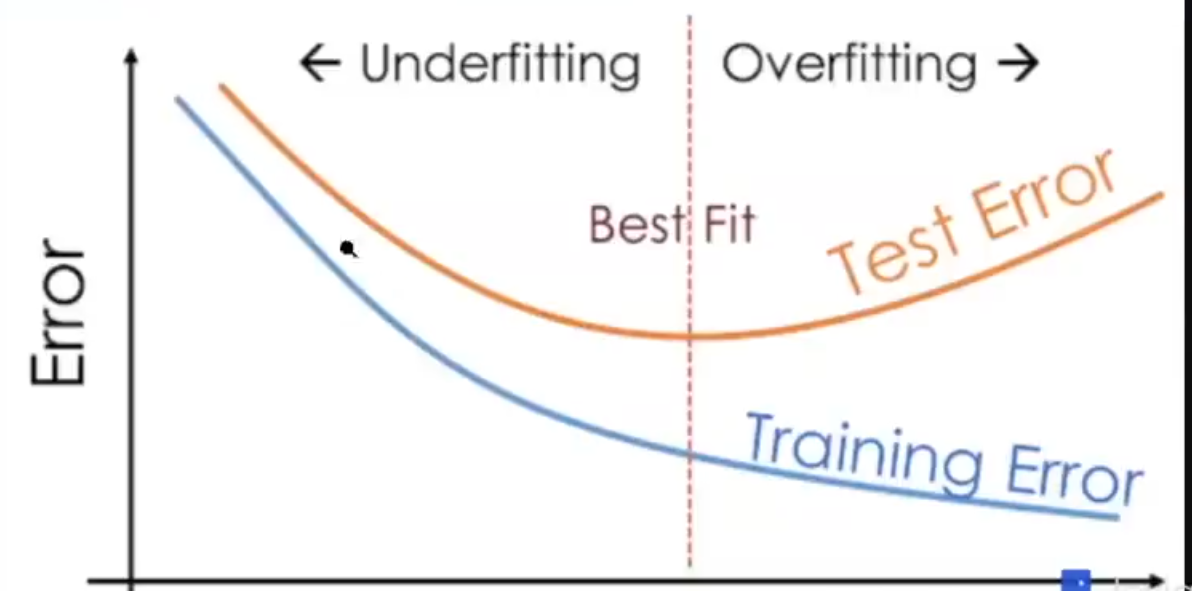

In [127]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
  ###Trains a model with the given parameters and returns training and validation error
  model = ModelClass(**params).fit(train_inputs, train_targets)
  train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared  = False)
  val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared = False)
  return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
  ###Train multiple models by varying the value of param_name according to param_values
  train_errors, val_errors = [], []
  for value in param_values:
    params  = dict(other_params)
    params[param_name] = value
    train_rmse, val_rmse = test_params(ModelClass, **params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

  plt.figure(figsize  =(10,6))
  plt.title('Overfitting_curve:' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training','Validation'])

In [136]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'learning_rate':0.05
}

Hyperparameters let you control the complexity of the model, when you increase the hyperparameter, it increases the complexity of the model/capacity of the model. i.e. increasing the n_estimators/max_depth then you are increasing the capacity/how much it can learn.

When you have few estimators both training error and validation error are very high beacuse the model has very low capacity and it has to deal with a lot of data/very few parameters to learn the real data. As you increase the model's capacity/n_estimators/max_depth, the model starts to learn more. Both the training error and the validation error start to decrease up to a point. At certain point the validation error starts to increase. This is the point at which the model starts to memorize specific patterns/values between the training data to further reduce the loss. As you make the model more and more complex by increasing the number of parameters it has i.e. max_depth it memorizes every input.

This is what decision trees do if you don't bound their depth. Such is a bad model that can't pass new data.

#### **No. of Trees**

CPU times: user 2min 34s, sys: 555 ms, total: 2min 35s
Wall time: 3min 18s


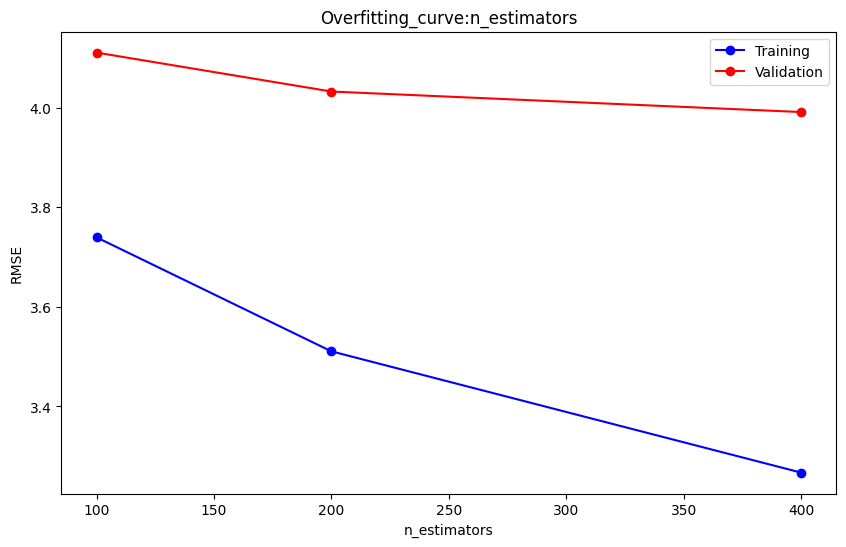

In [137]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100,200,400], **best_params)

Seems like 500  estimators has the lowest validation loss, it also takes a long time. Let's stick with 250 for now.

**The best pick is the point where validation error is the lowest**

In [139]:
best_params['n_estimators'] = 100

#### **Max Depth**

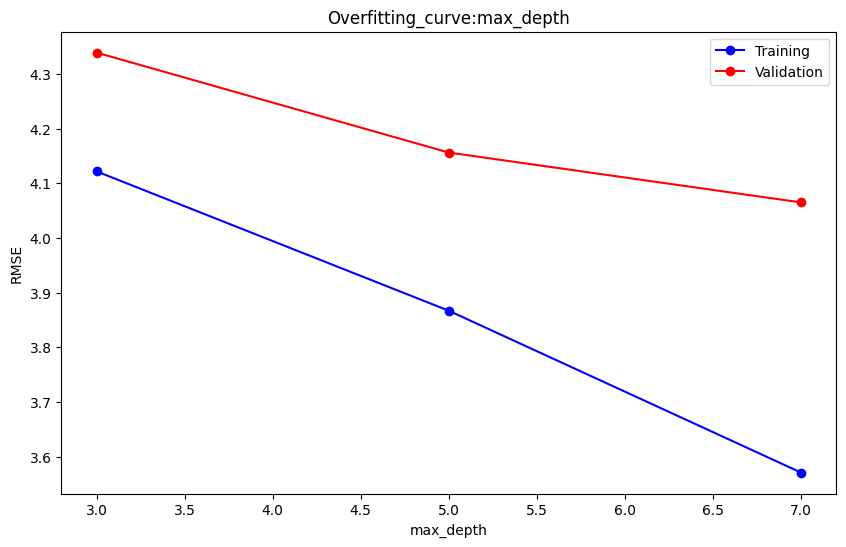

In [132]:
test_param_and_plot(XGBRegressor, 'max_depth', [3,5,7], **best_params)

Looks like a max depth of 5 is ideal.

In [140]:
best_params['max_depth'] =  7

#### **Learning Rate**

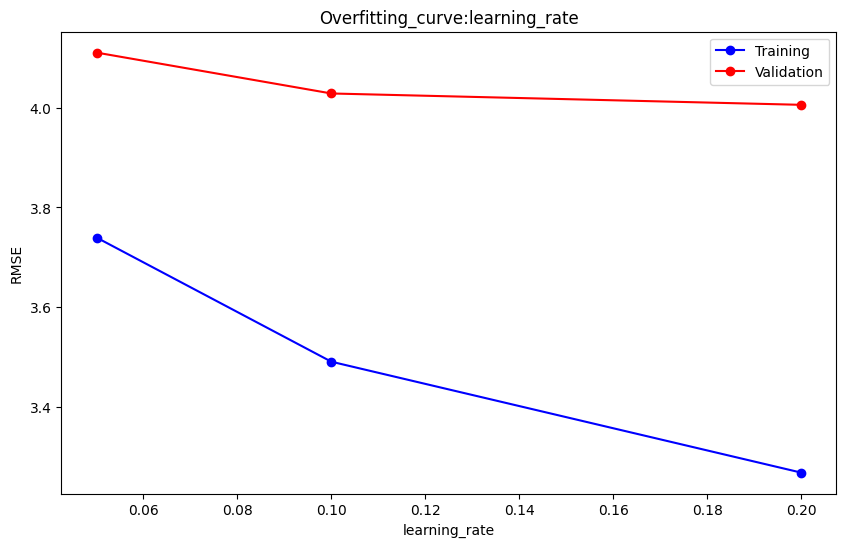

In [138]:
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05,0.1,0.2], **best_params)

Seems like the best learning rate is 0.25.

In [ ]:
best_params['learning_rate'] = 0.1

#### **Other Parameters**

Similarly we can experiment with other parameters.

Here's a set of parameters that works well:

In [146]:
xgb_model_final = XGBRegressor(objective = 'reg:squarederror',
                               n_jobs = -1,
                               random_state = 42,
                               n_estimators = 500,
                               max_depth = 8,
                               learning_rate = 0.1,
                               subsample = 0.7,
                               colsample_bytree = 0.7)

In [147]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [148]:
evaluate(xgb_model_final)

(2.353233,
 3.9902313,
 array([ 6.993327,  6.687431,  9.9195  , ..., 11.868375,  9.738622,
         9.509879], dtype=float32),
 array([14.747901,  5.541569, 48.814297, ...,  8.132787, 31.442993,
         8.231222], dtype=float32))

In [151]:
predict_and_submit(xgb_model_final, test_inputs,'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.289901
1,2015-01-27 13:08:24.0000003,10.764519
2,2011-10-08 11:53:44.0000002,4.591059
3,2012-12-01 21:12:12.0000002,8.720200
4,2012-12-01 21:12:12.0000003,16.544083
...,...,...
9909,2015-05-10 12:37:51.0000002,8.876191
9910,2015-01-12 17:05:51.0000001,10.855240
9911,2015-04-19 20:44:15.0000001,55.040691
9912,2015-01-31 01:05:19.0000005,19.548958


As you increase the `n_estimators`, you increase the `learning_rate`. `subsample1` - For each split of each tree, we only want to use `80%` of the rows. `colsample_bytree` - For each tree that we use only want to use  `80%` of the columns

This puts us at the `~460th` position out of `1483` i.e. top `30%`. This is pretty amazing considering:

* We are using just `1%` of the training data.
* We are only using a single model (most top submissions use ensembles)
* Our best model takes just 10 minutes to train as opposed to hours/days
*  We haven't fully optimized the hyperparameters yet.

Working with the entire dataset would have proved tiresome.
Speed of iteration is very important.
Creative feature enginering is very very important.
Hyperparameter tuning is good but not the biggest factor as compared to the others.

Submitting the model to Kaggle generates a score of `3.2` which is still goos considering its a single model and it has taken 1 min. and we haven't fully optimized the hyperparameters yet. Most models in Kaggle use ensemble techniques.

Lets save the weights of this model.


**Exercises:**
* Tune hyperparameters for Linear Regression & Random Forests
* Repeat with `3%`, `10%`, `30%` and `100%` training set. How much reduction in error does `100x` more data produce?
* Ensemble(average) the results from multiple models and observe if they're better than individual models.

#### **Save Model Weights to Google Drive**

In [ ]:
## Use joblib file and dump it
##from joblib import dump, load
##dump(clf, 'filename.joblib')
##clf = load('filename.joblib')

##On google drive
##Mount the google dirve
##from google.colab import drive
##drive.mount('/content/drive')
## Once the google drive is attached, you take the joblib file that you
##created and dump it in the google drive.

* Now you can have EDA notebook,
*  Feature engineering notebook which takes the data, adds a bunch of features save those files in parquet format to google_drive.
*  Then you can have a Machine Learning notebook which picks up those files and then train a bunch of models
* Inference notebook which can load those models to google drive and make predictions/on new data/individual inputs.

### **9. Train on GPU with the entire dataset(Optional)**
**Steps:**
* Install `dask`, `cudf` and `cuml`
* Load the dataset to GPU
* Create training and validation set.
* Perform feature engineering
* Train `XGBOOST` `cuml` model.
* Make predictions and submit.

**Allen Kong** has used `dask` in kaggle  and the model trains faster.Dmatrix. - score 2.89 under 17 mins

*GPUs are very efficient and faster as compared to CPUs*

###**10. Document & Publish Your work**
> **TIP # 13:** Always document and publish your projects online. They help improve your understanding, showcase your skills, often lead to inbound job opportunities.
* Add explanation using Markdown
* Clean up code & create functions.
* Publish notebook to Jovian
* Write a blog post and embed

This is the only way people can ascertain that you know Machine Learning, then you have to write a blogpost and link it from your resume. As people read your blogs that will lead to inbound job opportunities for you.

Consistently write blogposts and publish your projects online. Blogposts are great because you don't have to show the entire block of code.

Blogposts allow you to embed code/graphs/outputs from Jovian.

**Check tutorial on how to write a data science blogpost**

### References
* Blogpost by Allen King
* Geopy
* Machine Learning with Python from zero to GBMS
* Data Science blog post from scratch
* Haversine distance with numpy
* Opendatasets library
* Pandas datetime components
* EDA project from scratch  